# 피마인디언 당뇨병 예측


1. 결정트리와 SVM으로 학습, 예측 수행

&각각 혼돈행렬, 정확도, 정밀도, 재현율, F1 스코어 계산


2. 결정 트리에서 max_depth, min_sample_split,min_samples_leaf값을 하나씩 선택해 tree 그림 그려보기. 

3. 두 가지 모델에 대해서 GridSearchCV를 사용해서 best가 되는 경우의 parameter 값과 그때의 정확도 계산.



In [2]:
import numpy as np
import pandas as pd

## 0.   데이터 전처리

In [5]:
df=pd.read_csv('/content/drive/MyDrive/0422B/0422/pima-indians-diabetes.csv',skiprows=9,header=None)

In [7]:
df.columns=['P','G','BP','S','I','BMI','D','AGE','Class']
df.head()

,P,G,BP,S,I,BMI,D,AGE,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.isna().sum().sum()

0

In [36]:
#X,y를 ndarray로 추출
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [10]:
X.shape, y.shape

((768, 8), (768,))

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(
    X,y,stratify=y, test_size=0.2, random_state=2022
)

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [13]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([400, 214]))

In [14]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([100,  54]))

## 1.Decision Tree Classifier
## 1-1.학습,예측, 평가

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=2022)
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [21]:
params={'max_depth':[2,3,4,5,6],
        'min_samples_split':[2,3,4]}

In [22]:
#학습
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2022)

In [23]:
#예측 및 평가
dtc.score(X_test,y_test)

0.6948051948051948

## 1-2.tree 그림 그리기

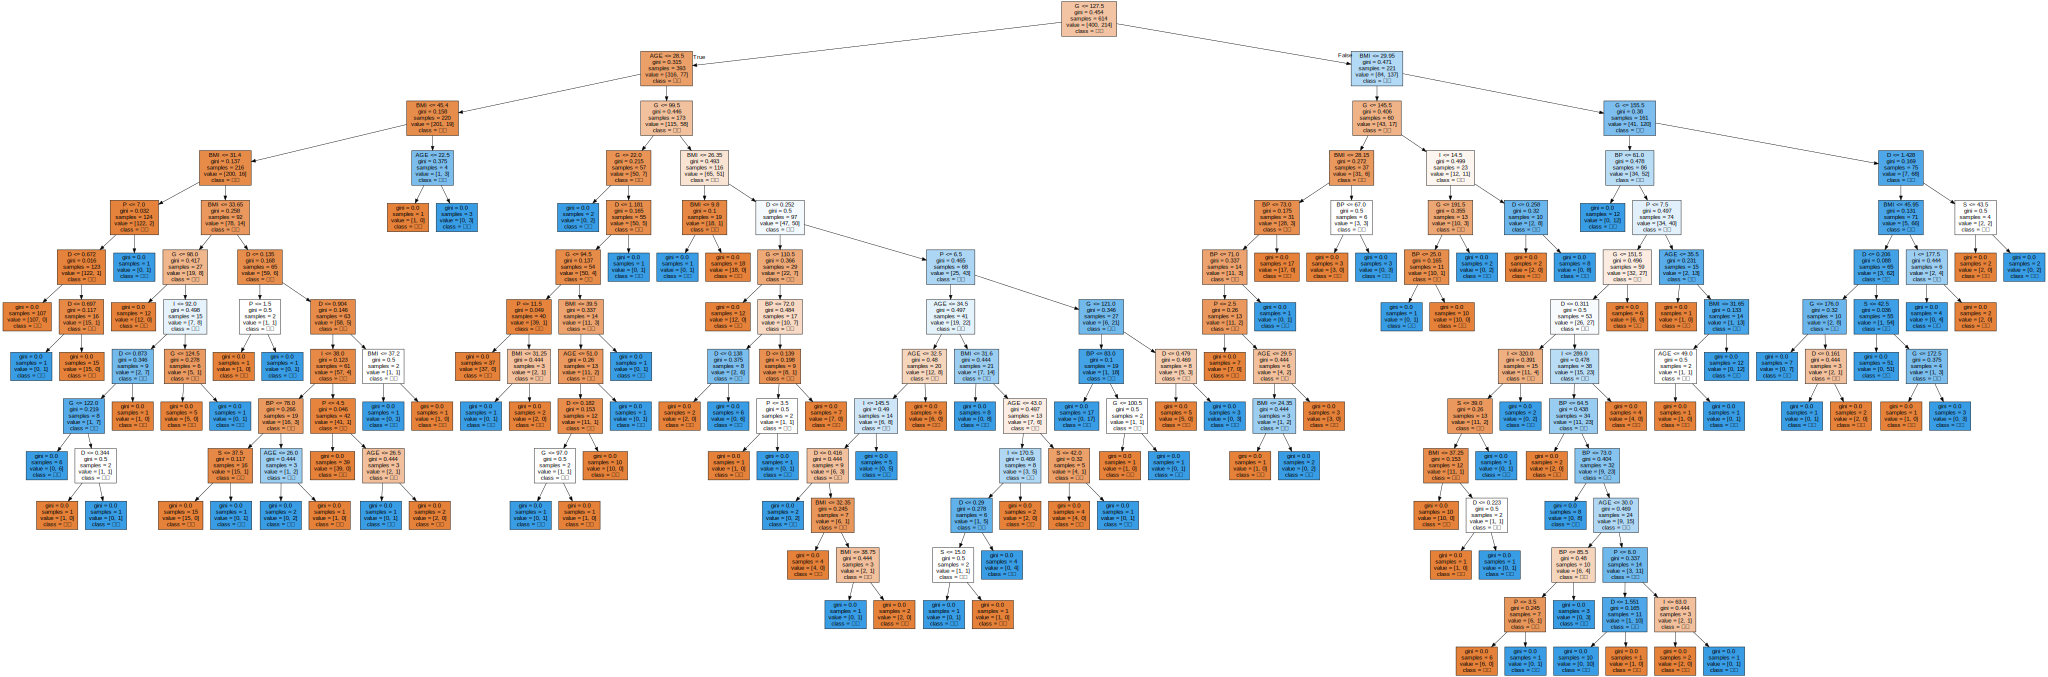

In [45]:
#모델 시각화 1.디폴트
from sklearn.tree import export_graphviz

export_graphviz(
    dtc, out_file='pima.dot',
    impurity=True,filled=True,
    feature_names =['P','G','BP','S','I','BMI','D','AGE'],
    class_names=['음성','양성']
    
)

import graphviz
with open('pima.dot') as file:
    dot_graph =file.read()
graphviz.Source(dot_graph)


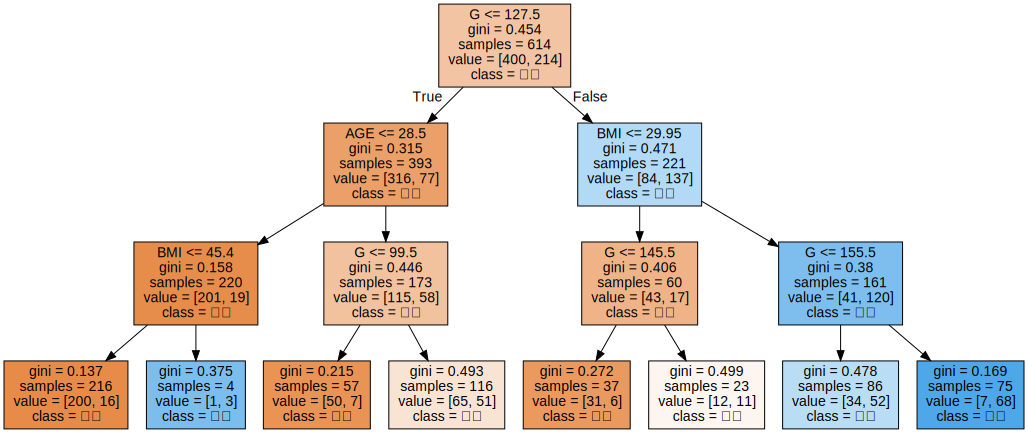

In [48]:
#모델 시각화 2.max_depth=3
dtc2=DecisionTreeClassifier(max_depth=3,random_state=156)
dtc2.fit(X_train,y_train)


export_graphviz(
    dtc2, out_file='pima2.dot',
    impurity=True,filled=True,
    feature_names =['P','G','BP','S','I','BMI','D','AGE'],
    class_names=['음성','양성']
    
)

import graphviz
with open('pima2.dot') as file:
    dot_graph =file.read()
graphviz.Source(dot_graph)


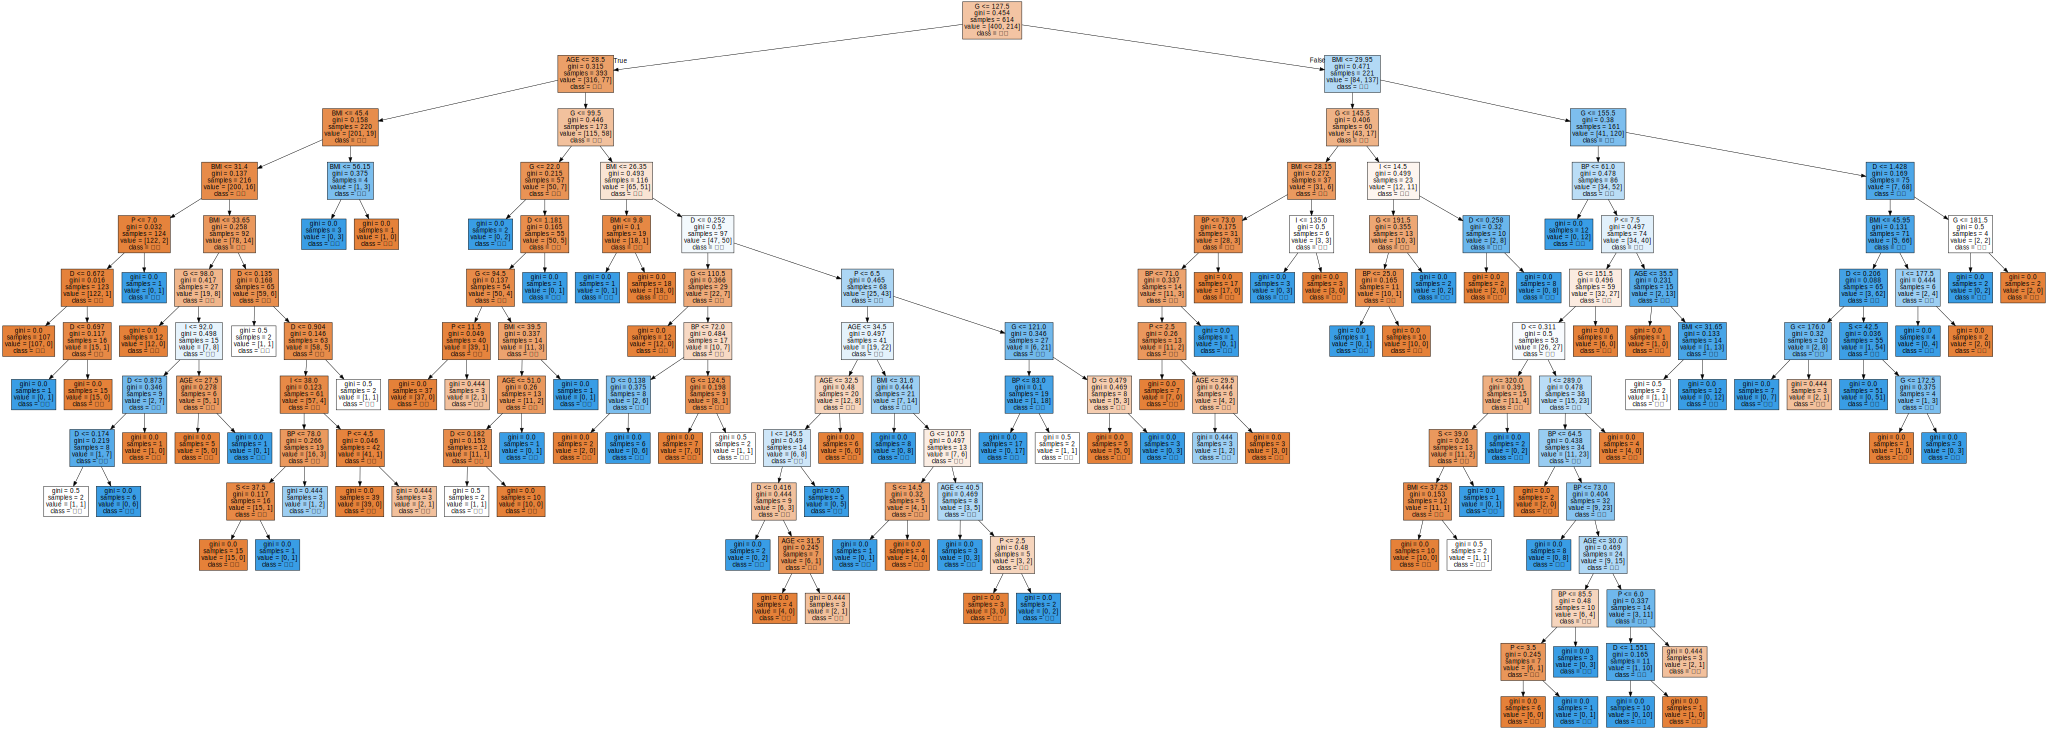

In [51]:
#모델 시각화 3.min_samples_split=4
dtc3=DecisionTreeClassifier(min_samples_split=4,random_state=156)
dtc3.fit(X_train,y_train)


export_graphviz(
    dtc3, out_file='pima3.dot',
    impurity=True,filled=True,
    feature_names =['P','G','BP','S','I','BMI','D','AGE'],
    class_names=['음성','양성']
    
)

import graphviz
with open('pima3.dot') as file:
    dot_graph =file.read()
graphviz.Source(dot_graph)


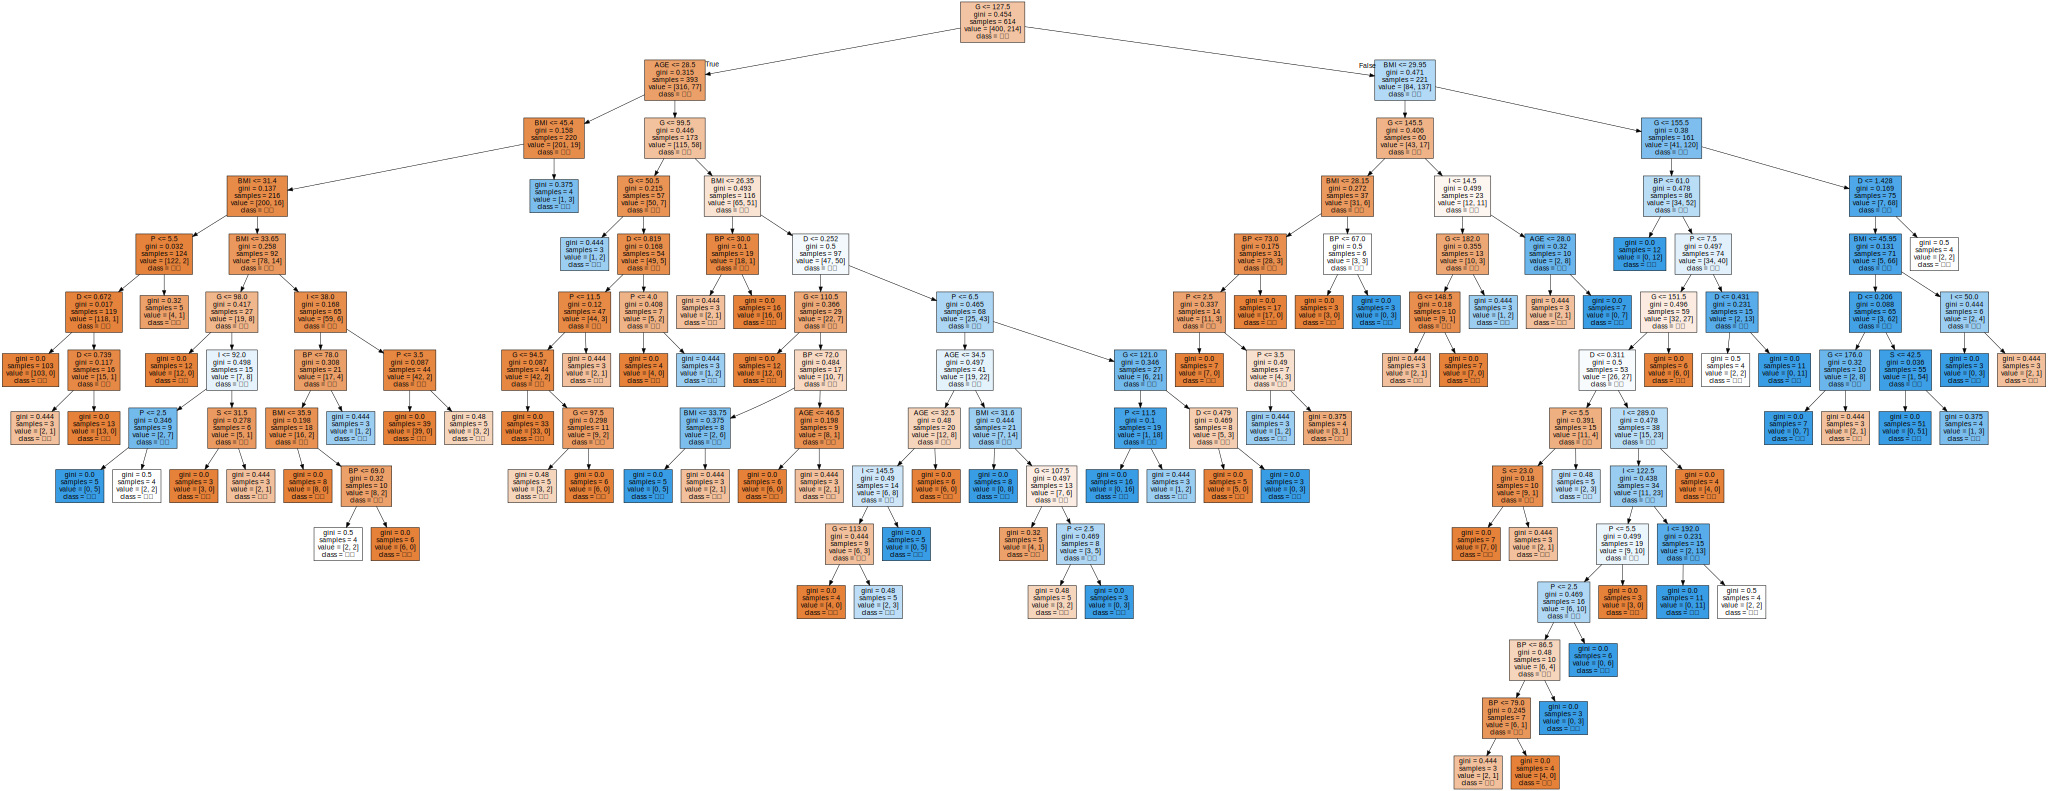

In [52]:
#모델 시각화 4.min_samples_leaf=3
dtc4=DecisionTreeClassifier(min_samples_leaf=3,random_state=156)
dtc4.fit(X_train,y_train)


export_graphviz(
    dtc4, out_file='pima4.dot',
    impurity=True,filled=True,
    feature_names =['P','G','BP','S','I','BMI','D','AGE'],
    class_names=['음성','양성']
    
)

import graphviz
with open('pima4.dot') as file:
    dot_graph =file.read()
graphviz.Source(dot_graph)


## 1-3.GridSearchCV를 사용해서 best가 되는 경우의 parameter 값과 그때의 정확도 계산.

In [53]:
from sklearn.model_selection import GridSearchCV
grid_dt=GridSearchCV(dtc,params,scoring='accuracy',cv=5)
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [54]:
grid_dt.best_params_

{'max_depth': 5, 'min_samples_split': 3}

In [55]:
best_dt=grid_dt.best_estimator_
best_dt.score(X_test,y_test)

0.6558441558441559

## 1-4.혼돈행렬, 정확도, 정밀도, 재현율, F1 스코어 계산



In [61]:
pred_dt=best_dt.predict(X_test)
sdf=pd.DataFrame({'y_test':y_test,'dt':pred_dt})
sdf.head()

,y_test,dt
0,0,0
1,1,0
2,0,0
3,0,1
4,0,0


In [64]:
from sklearn.metrics import confusion_matrix
#혼돈행렬
confusion_matrix(y_test, pred_dt)

array([[73, 27],
       [26, 28]])

In [70]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
#정확도
accuracy_score(y_test,pred_dt)

0.6558441558441559

In [68]:
#정밀도
precision_score(y_test,pred_dt)

0.509090909090909

In [69]:
#재현율
recall_score(y_test,pred_dt)

0.5185185185185185

In [74]:
#f1스코어
f1_score(y_test,pred_dt)

0.5137614678899083

## 2.SVM 모델
### 2-1.학습 및 평가

In [75]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.7402597402597403

### 2-2.GridSearchCV를 사용해서 best가 되는 경우의 parameter 값과 그때의 정확도 계산

In [85]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 2022,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [89]:
params={'C':[0.01,0.1,1,10,100]}

In [88]:
from sklearn.model_selection import GridSearchCV

svc=SVC(random_state=2022)
grid_sv=GridSearchCV(svc,params,scoring='accuracy',cv=5)
grid_sv.fit(X_train,y_train)
grid_sv.best_params_

{'C': 1}

In [90]:
params={'C':[0.5,1,1.5]}
grid_sv=GridSearchCV(svc,params,scoring='accuracy',cv=5)
grid_sv.fit(X_train,y_train)
grid_sv.best_params_

{'C': 1.5}

In [91]:
params={'C':[1,4,1.5,1.6,1.7,1.8]}
grid_sv=GridSearchCV(svc,params,scoring='accuracy',cv=5)
grid_sv.fit(X_train,y_train)
grid_sv.best_params_

{'C': 1.5}

In [92]:
best_sv=grid_sv.best_estimator_
best_sv.score(X_test,y_test)

0.7337662337662337

In [93]:
#c값 조정 안 했을 경우
svc=SVC(C=1, random_state=2022)
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.7402597402597403

### 2-3.혼돈행렬, 정확도, 정밀도, 재현율, F1 스코어 계산

In [94]:
pred_sv=best_sv.predict(X_test)
sv=pd.DataFrame({'y_test':y_test,'dt':pred_sv})
sv.head()

,y_test,dt
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [95]:
#혼돈행렬
confusion_matrix(y_test, pred_sv)

array([[85, 15],
       [26, 28]])

In [96]:
#정확도
accuracy_score(y_test,pred_sv)

0.7337662337662337

In [97]:
#정밀도
precision_score(y_test,pred_sv)

0.6511627906976745

In [98]:
#재현율
recall_score(y_test,pred_sv)

0.5185185185185185

In [99]:
#f1스코어
f1_score(y_test,pred_sv)

0.577319587628866